# **Iris Analysis**

In [1]:
# Import pandas, matplotlib, seaborn, and sklearn libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#	Read the csv file named iris.csv.
iris = pd.read_csv("Iris.csv")

In [3]:
#	Show first five records.
iris = iris.set_index("Id")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#	Show a dataframe where sepal width is greater than 4.
iris.query("SepalWidthCm > 4")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
16,5.7,4.4,1.5,0.4,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa


In [5]:
#	Show a dataframe where petal width is greater than 1.
iris.query("PetalWidthCm > 1")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [6]:
#	Retrieve records which have petal width greater than 2.
iris.query("PetalWidthCm > 2")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica
106,7.6,3.0,6.6,2.1,Iris-virginica
110,7.2,3.6,6.1,2.5,Iris-virginica
113,6.8,3.0,5.5,2.1,Iris-virginica
115,5.8,2.8,5.1,2.4,Iris-virginica
116,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,3.8,6.7,2.2,Iris-virginica


In [7]:
#	Figure out the relationship between sepal length and petal length.
corr = iris["SepalLengthCm"].corr(iris["PetalLengthCm"])
corr

0.8717541573048718

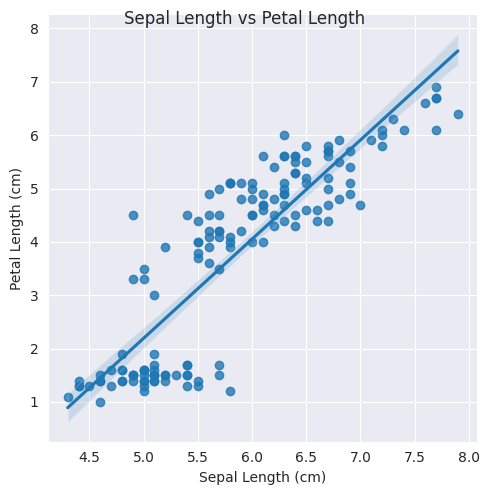

In [28]:
# Draw a scatter plot for sepal length and petal length and show the relationship between them.

# "{lmplot} combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset."
sepPet = sns.lmplot(data = iris, x = "SepalLengthCm", y = "PetalLengthCm")

# Styling
sns.set_style("darkgrid")
sepPet.set(xlabel = "Sepal Length (cm)", ylabel = "Petal Length (cm)")
fig = sepPet.fig 
sepPet = sepPet.fig.suptitle("Sepal Length vs Petal Length")

sepPet;

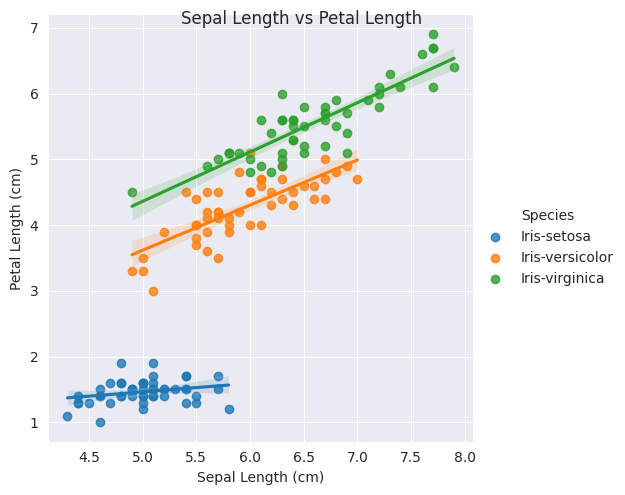

In [9]:
#	Now apply species as hue in the same scatter plot for better visibility and understanding.
sepPet2 = sns.lmplot(data = iris, x = "SepalLengthCm", y = "PetalLengthCm", hue = "Species")

# Styling
sepPet2.set(xlabel = "Sepal Length (cm)", ylabel = "Petal Length (cm)")
sepPet2 = sepPet2.fig.suptitle("Sepal Length vs Petal Length")
sepPet2;

# **Applying Linear Regression**

Model 1

In [10]:
# a. Create an object named y which stores the dataframe of a dependent variable named 'SepalLengthCm'.
y = iris[["SepalLengthCm"]].copy()
y.head()

,SepalLengthCm
Id,
1,5.1
2,4.9
3,4.7
4,4.6
5,5.0


In [11]:
# b. Create an object named x which stores the dataframe of an independent variable named 'SepalWidthCm'.
x = iris[["SepalWidthCm"]].copy()
x.head()

,SepalWidthCm
Id,
1,3.5
2,3.0
3,3.2
4,3.1
5,3.6


In [12]:
# c. Divide the variables into x_train, x_test, y_train, and y_test variables using the train_test_split method using the parameters x, y, and test size = 30%.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [13]:
# d. Show first five records of all four variables/objects.
display(x_train.head())
print("-------------------")
display(x_test.head())
print("-------------------")
display(y_train.head())
print("-------------------")
display(y_test.head())

,SepalWidthCm
Id,
144,3.2
37,3.5
23,3.6
111,3.2
26,3.0


-------------------


,SepalWidthCm
Id,
84,2.7
36,3.2
93,2.6
131,2.8
21,3.4


-------------------


,SepalLengthCm
Id,
144,6.8
37,5.5
23,4.6
111,6.5
26,5.0


-------------------


,SepalLengthCm
Id,
84,6.0
36,5.0
93,5.8
131,7.4
21,5.4


In [14]:
# e. Create an object named lr and assign memory from the linearregression() method.
lr = LinearRegression()

In [15]:
# f. Fit both training sets into the fit method.
lr.fit(x_train, y_train);

In [16]:
# g. Predict x_test from predict method and store the result into y_pred object.
y_pred = pd.DataFrame(lr.predict(x_test))

In [17]:
# h. Show the first five records from the actual and predicted objects.
print("Actual")
display(y_test.head())
print("-------------------")
print("Predicted")
display(y_pred.head())

Actual


,SepalLengthCm
Id,
84,6.0
36,5.0
93,5.8
131,7.4
21,5.4


-------------------
Predicted


,0
0,5.917476
1,5.826355
2,5.935700
3,5.899252
4,5.789907


In [18]:
# i. Try to find out mean_squared_error() in the prediction after passing the parameters y_test and y_pred, mind the result.
mse = mean_squared_error(y_test, y_pred)
mse

0.547895464172223

Model 2

In [19]:
# a. Create an object named y and store a dataframe with 'SepalLengthCm' as a dependent variable.
y2 = iris[["SepalLengthCm"]].copy()
y2.head()

,SepalLengthCm
Id,
1,5.1
2,4.9
3,4.7
4,4.6
5,5.0


In [20]:
# b. Store 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' dataframe in x as independent variables.
x2 = iris[["SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].copy()
x2.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,
1,3.5,1.4,0.2
2,3.0,1.4,0.2
3,3.2,1.3,0.2
4,3.1,1.5,0.2
5,3.6,1.4,0.2


In [21]:
# c. Do train_test_split like you did in model 1, test_size is again 30%.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3)

In [22]:
# d. Fit both train set into fit method of linearregression.
lr2 = LinearRegression()
lr2.fit(x_train2, y_train2);

In [23]:
# e. Predict x_test and store the result into y_pred using the predict method.
y_pred2 = pd.DataFrame(lr2.predict(x_test2))

In [24]:
# f. Find out the mean_squared_error of the actual and predicted test set.
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

0.1097369702429223

In [25]:
# Gets coefficients for all x-variables
lr2.coef_

array([[ 0.63816417,  0.62016724, -0.3542806 ]])

In [26]:
# The higher the magnitude of a coefficient, the more it will change the value of y. 
# Out of the 3 x-variables, petal length seems to have the strongest correlation with the y-variable sepal length
print({"SepalWidthCm": lr2.coef_[0,0], "PetalLengthCm": lr2.coef_[0,1], "PetalWidthCm": lr2.coef_[0,2]})

{'SepalWidthCm': 0.6381641698352399, 'PetalLengthCm': 0.6201672385713333, 'PetalWidthCm': -0.3542806046012979}


In [27]:
# g. Describe which model is better and why?

# The second model is better because its mean square error is roughly an order of magnitude closer to 0, meaning it is a lot more accurate.